# Coffee and Productivity

Does coffee consumption in a population correlate with higher productivity as measured in GDP per hour worked?

Background: On an individual level, consumption of coffee and its active ingredient, caffeine (a stimulant), is associated with higher levels of “energy” and “productivity”. But in a given population, such as a nation-state, does higher coffee consumption indicate a higher level of productivity? 


In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
coffee_data_to_load = "data/project_data.csv"

# Read the Data
coffee_data = pd.read_csv(coffee_data_to_load)

# coffee_data.head()

plt.rcParams["figure.figsize"] = 16,9


## 1-1. World Coffee Consumption by Year: Does World Consume More Coffee Over Time?
mean coffee consumption by year (line graph) - 
x axis = year
y axis = coffee amount
Karen

## 1-2. Coffee Consumption Trend by Country: How Much Coffee Is Consumed by Year (in Total)?
use project_data.csv to generate the plot. (line graph) - mean by year. Plot in line.
Karen

## 3-1. Overall Productivity Trend: Does Productivity Grow by Year? (Growth in labour productivity indicates a higher level of output for every hour worked)
mean productivity (line plot)
x axis = year
y axis = GDPhrwkd
Jin

Text(0.5,0,'Year')

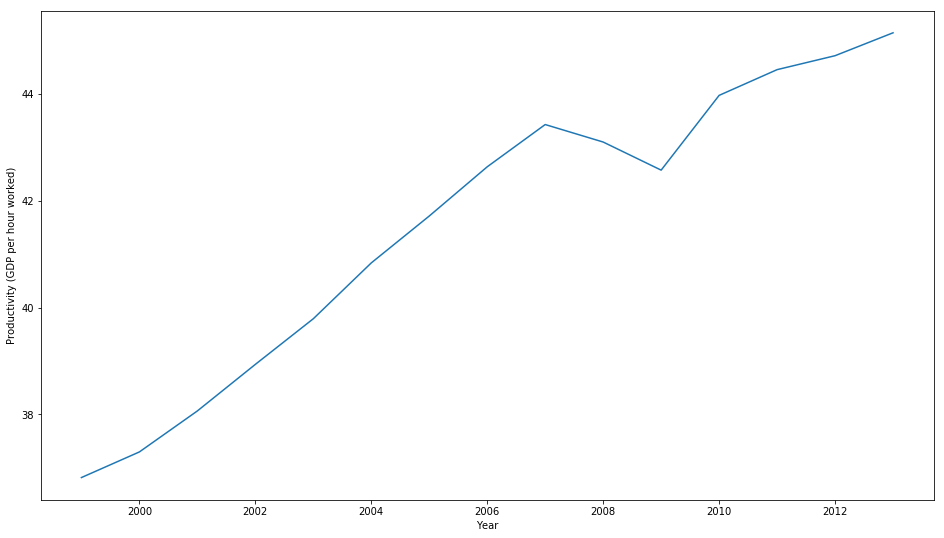

In [3]:
# Store the Productivity(GDP per hour worked) Data Grouped by Country and Year 
productivity_trend = coffee_data[["Country Name","Year","gdp_per_hour_worked"]]

# Preview DataFrame
df_productivity_trend =productivity_trend.pivot(index="Year", columns="Country Name", values="gdp_per_hour_worked")

# Generate the Plot (with Error Bars)
graph_productivity_trend = df_productivity_trend.mean(axis=1).plot()

#style
graph_productivity_trend.set_ylabel("Productivity (GDP per hour worked)")
graph_productivity_trend.set_xlabel("Year")

# Draw line of overall coffee consumption 
# df_productivity_trend.mean(axis=1).plot()

# Save the Figure
#plt.savefig('graph_productivity_trend.png', bbox_inches="tight")


## 3-2. Productivity Trend by Country: How Does Productivity Change by Country Over Time?
use project_data.csv to generate the plot. (line graph)  - GDP per hour worked
Jin

Text(0.5,0,'Year')

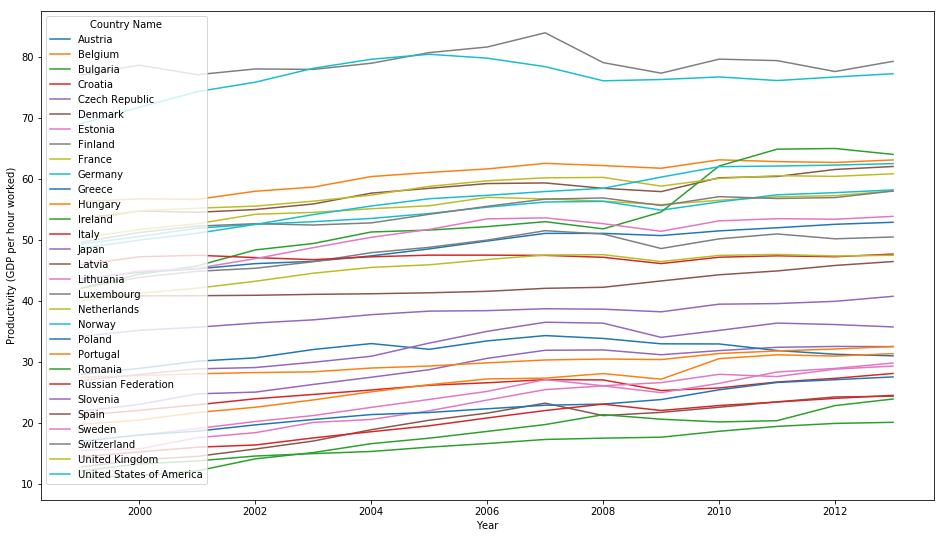

In [8]:
# Generate the Plot 
graph_productivity_by_country = df_productivity_trend.plot()

#style
graph_productivity_by_country.set_ylabel("Productivity (GDP per hour worked)")
graph_productivity_by_country.set_xlabel("Year")

# Draw line of coffee consumption by country
# df_productivity_trend.plot()

# Save the Figure
#plt.savefig('graph_productivity_by_country.png', bbox_inches="tight")

# Show the Figure
#plt.show()

## 3-3. Overall Trend: The Mean of Coffee Consumption and the Mean of Productivity by Year (Together)

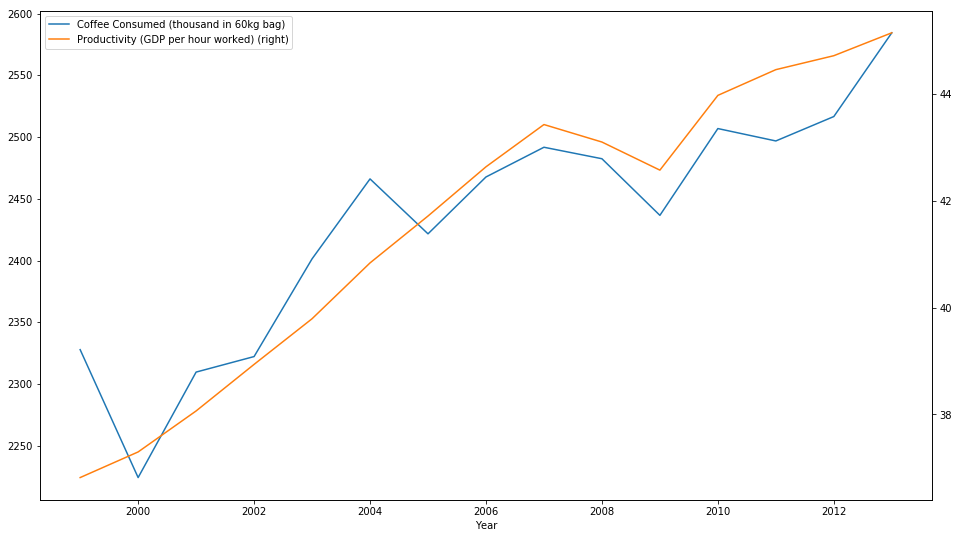

In [10]:
# Store the Coffee Consumption Data Grouped by Country and Year 
coffee_consumption_trend = coffee_data[["Country Name","Year","Coffee Consumed"]]

# Preview DataFrame
df_coffee_consumption = coffee_consumption_trend.pivot(index="Year", columns="Country Name",values="Coffee Consumed")

# Draw line of overall coffee consumption and productivity (multiple axis with different scales)

df_coffee_consumption.mean(axis=1).plot(label="Coffee Consumed (thousand in 60kg bag)", legend=True)
df_productivity_trend.mean(axis=1).plot(secondary_y=True, label="Productivity (GDP per hour worked)", legend=True)


## 2. Top Coffee Drinking Nations (per Capita, kg or lb): Which Country Drinks Coffee the Most per Person in 20XX?
use project_data.csv to generate the plot. (bar graph) - top 10? 
Srini

## 4. Top Productivity Countries in 20XX: Which Countries Show Higher Productivity Compare to Other Countries?
use project_data.csv to generate the plot. (bubble plot)
x axis = countries
y axis = productivity (GDPhrworkd)
bar graph or scatter plot
all countries in data
Srini

## 5-1. Correlation Between Coffee Consumption and Productivity: Does the amount of Coffee Consumption affect Productivity among countries? (Pick a certain year, ex: 2013)
use project_data.csv to generate the plot. (bubble plot and regression)
x axis = country
y axis = GPDhrwkd
bubble size coffee consumption?
(maybe swap y axis and bubble size?)
maybe a whisker plot - how far away from mean?
total consumption and total GDPhrwkd for selected years (pick maybe two or three to compare?)
Michael

## 5-2. Correlation of Changes in Coffee Consumption and Productivity: Does the Changes in the Coffee Consumption Correlated with the Changes in Productivity throughout Certain period? (dynamic analysis, Pick countries which show bigger changes in values) 
use project_data.csv to generate the plot. (scatter plot and regression)

x axis = country 
y axis = gdphrwkd
calculate the increased/decreased value of consumption
calculate the increased/decreased value of GDPhrwkd
ex: all years or 10 years (if plot is too busy) or in some increment (2 years, 5 years)?
look for dramatic changes
Michael


## 6-1. Correlation Between Coffee Consumption and Productivity: Is P-Value < 0.05 and Can We Reject Null-Hypothesis(H0)? (Hypothesis Test)
P-Value graph
this assumes a single year in 5-1
Andrew

## 6-2. Correlation Between the Changes in the Coffee Consumption and the Changes in Productivity: Is P-Value < 0.05 and Can We Reject Null-Hypothesis(H0)? (Hypothesis Test)

Different from 6-1. 
This is for the "rate of change" in 5-2
Andrew

## 7. Correlation Between Coffee Consumption and Unemployment: A question needs to be defined (optional)
use project_data.csv to generate the plot. 


## 8. World Coffee Major Producers as % of World: Which Countries Produce Coffee? (optional)
use exports data from www.ico.org/new_historical.asp to generate the plot.(pie chart or bubble map??)

## Conclusions
Summary of findings - Andrew

In [ ]:
# DATA Source
http://www.ico.org/new_historical.asp
https://knoema.com/search?query=coffee&source=HomePage
https://www.worldatlas.com/articles/top-10-coffee-consuming-nations.html
https://fusiontables.google.com/DataSource?docid=1C-fn6nSe21acP0xJIO1T1x0wohqfMYCQyJjbqdk#rows:id=1
https://data.oecd.org/lprdty/gdp-per-hour-worked.htm
https://www.oecd-ilibrary.org/employment/data/oecd-productivity-statistics/gdp-per-capita-and-productivity-growth_data-00685-en